### AE approach
---
The AE approach tries to let an AE look at scenes where a given quantifier q was used by a teacher (language speaker), this is repeated many times till whatever structure typical to scenes True under the q quantifier are encoded in the AE structure and each representation of this structure is given in the hidden vector. When learning is done and given a scene we use the AE as an anomaly classifier to decide whether the scene is True under the q quantifier. The idea is that after seeing many q True scenes a non q True scene will have relatively high reconstruction errors.

Many types of AEs can be used and are implemented

## Imports

### my class imports

In [1]:
from quants.quantifiers import *
from quants.models import AE

Using TensorFlow backend.


### Global Imports

In [2]:
import numpy as np
import pandas as pd

### Neural Network imports

In [3]:
import tensorflow as tf

print("TensorFlow version: ", tf.__version__)

import keras

from keras.models import Sequential, Model
from keras.layers import SimpleRNN, LSTM, Dense, Conv1D, MaxPooling1D, UpSampling1D, Input, Bidirectional, RepeatVector, TimeDistributed, Dropout, LeakyReLU, Flatten
from keras.utils import plot_model, np_utils

TensorFlow version:  2.2.0


In [4]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.3)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))
print("Keras backend: ", tf.python.keras.backend.backend())
tf.python.keras.backend.set_session(sess)
tf.config.list_logical_devices()

Keras backend:  tensorflow


[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:XLA_CPU:0', device_type='XLA_CPU'),
 LogicalDevice(name='/device:XLA_GPU:0', device_type='XLA_GPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

### AE Models

In [ ]:
class CNNAE(AE):
    """ Convolutional classifier model builder method """

    def build(self):
        model = Sequential()
        # encoding
        model.add(Conv1D(60, 32, strides=1, activation='relu', padding='causal', input_shape=(Quantifier.scene_len, 1)))
        model.add(Conv1D(80, 10, strides=1, activation='relu', padding='causal'))
        model.add(Dropout(0.25))
        model.add(Conv1D(100, 5, strides=1, activation='relu', padding='causal'))
        model.add(MaxPooling1D(1))
        # decoding
        model.add(Dropout(0.25))
        model.add(Dense(300, activation='relu'))
        model.add(Dense(1, activation='relu'))
        model.compile(optimizer='adam', loss='mse')
        return model

    @staticmethod
    def prepare(scenes):
        return np_utils.to_categorical(scenes)

In [25]:

np.zeros((10, 10)).shape

(10, 10)

In [39]:
model = Sequential()
model.add(Dense(10, use_bias=False, trainable=False, weights=(np.eye(10),), activation='linear', input_dim=10))
# encoding


In [40]:
class DenseAE(AE):
    """ dense classifier model builder method """

    def build(self):
        model = Sequential()
        # encoding
        model.add(Dense(Quantifier.scene_len, use_bias=False, trainable=False,
                        weights=(np.eye(Quantifier.scene_len),), activation='linear',
                        input_dim=Quantifier.scene_len))
        # model.add(Dense(75, activation='linear', input_dim=Quantifier.scene_len))
        # model.add(Flatten())
        # model.add(Dense(50, activation='sigmoid'))
        # model.add(Dense(25, activation='sigmoid'))
        # # decoding
        # model.add(Dense(50, activation='sigmoid'))
        # model.add(Dense(75, activation='sigmoid'))
        # model.add(Dense(Quantifier.scene_len, activation='linear'))
        model.compile(optimizer='adam', loss='mse')
        return model

In [7]:
# class RNNAE(AE):
#     """ RNN Auto Encoder model builder method """
#     def build(self):
#         model = Sequential()
#         model.add(Bidirectional(SimpleRNN(15, activation='sigmoid', input_shape=(Quantifier.scenes_len, 1))))
#         model.add(Dropout(0.5))
# #         model.add(Bidirectional(SimpleRNN(15, activation='sigmoid', return_sequences=True)))
# #         model.add(Dropout(0.5))
#         model.add(RepeatVector(Quantifier.scene_len))
#         model.add(SimpleRNN(15, activation='sigmoid', return_sequences=True))
#         model.add(Dropout(0.5))
# #         model.add(Bidirectional(SimpleRNN(25, activation='sigmoid', return_sequences=True)))
# #         model.add(Dropout(0.5))
#         model.add(TimeDistributed(Dense(1)))
#         model.compile(optimizer='adam', loss='mse')
#         return model

In [8]:
# class LSTMAE(AE):
#     """ LSTM Auto Encoder model builder method """
#     def build(self):
#         model = Sequential()
#         model.add(LSTM(15, activation='sigmoid', input_shape=(Quantifier.scene_len, 1)))
#         model.add(Dropout(0.5))
#         model.add(RepeatVector(Quantifier.scene_len))
#         model.add(LSTM(15, activation='sigmoid', return_sequences=True))
#         model.add(Dropout(0.5))
#         model.add(TimeDistributed(Dense(1)))
#         model.compile(optimizer='adam', loss='mse')
#         return model   

In [9]:
# class BLSTMAE(AE):
#     """ BLSTM Auto Encoder model builder method """
#     def build(self):
#         model = Sequential()
#         model.add(Bidirectional(LSTM(15, activation='sigmoid', input_shape=(Quantifier.scene_len, 1))))
#         model.add(Dropout(0.5, name="dropout_1"))
#         model.add(RepeatVector(Quantifier.scene_len))
#         model.add(Bidirectional(LSTM(15, activation='sigmoid', return_sequences=True)))
#         model.add(Dropout(0.5, name="dropout_2"))
#         model.add(TimeDistributed(Dense(1)))
#         model.compile(optimizer='adam', loss='mse')
#         return model

### Learn

In [12]:
natural_quantifier = The()  # , Both(), No(), All(), Some(), Most()]

# unnatural_quantifiers = [MinMax(2, 10), MinMax(3, 6), Or([MinMax(2, 5), MinMax(10, 20)])]
unnatural_quantifiers = MinMax(2, 5)  # , MinMax(8, 10), MinMax(12, 15), MinMax(17, 20), MinMax(24, 30), MinMax(37, 50)]

classifier = DenseAE(natural_quantifier)
classifier.plot()
classifier.learn(epochs=3, max_len=100)

DenseAE model Auto Encoding anomaly detection of The()
Epoch 1/3
1000/1000 [==============================] - 0s 490us/step - loss: 0.9344
Epoch 2/3
1000/1000 [==============================] - 0s 346us/step - loss: 0.2311
Epoch 3/3
1000/1000 [==============================] - 0s 323us/step - loss: 0.2310
TRAIN


TypeError: test() missing 1 required positional argument: 'labels'

### Test

In [14]:
def test_quantifer(model, quantifier):
    test_size = 10

    test_scenes = generate_random_scenes(scenes_num=test_size)
    test_labels = [quantifier.quantify(test_scene) for test_scene in test_scenes]
    test_results = [model.evaluate(test_scene.reshape(1, -1, 1), 
                                   test_scene.reshape(1, -1, 1), verbose=0) for test_scene in test_scenes]
    thresh = np.mean(test_results)
    test_thresh = [test_result < thresh for test_result in test_results]
    print(np.sum(np.array(test_labels) == np.array(test_thresh)))

In [15]:
quantifiers = [N(1), N(2), N(3), N(10), The(), Both(), Some(), Few(), No(), All(), Most()]

def test_quantifers(model):
    test_size = 1000
    test_results = pd.DataFrame(columns=[quantifier.name() for quantifier in quantifiers])

#     for i in range(test_size):
    test_result = []
    for quantifier in quantifiers:
        test_scenes = generate_quantified_scenes(quantifier, scenes_num=test_size)
        test_result.append(model.evaluate(test_scenes, test_scenes, verbose=0))

    test_results.loc[0] = test_result
    return test_results    

#  PYOD

In [1]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data

Using TensorFlow backend.


In [2]:
contamination = 0.1  # percentage of outliers
n_train = 500  # number of training points
n_test = 500  # number of testing points
n_features = 25 # Number of features

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test,
    n_features= n_features, 
    contamination=contamination,random_state=1234)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

/home/doron/git/research/RESEARCH/lib/python3.8/site-packages/pyod/utils/data.py:186: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  warn('behaviour="old" is deprecated and will be removed '


In [3]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

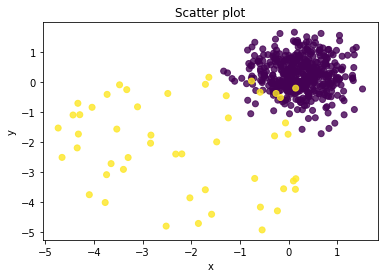

In [4]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']

# Plot
import matplotlib.pyplot as plt
plt.scatter(X_train[0], X_train[1], c=y_train, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
clf1 = AutoEncoder(hidden_neurons =[25, 2, 2, 25])
clf1.fit(X_train)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

450/450 [==============================] - 0s 109us/step - loss: 4.6857 - val_loss: 4.5935
Epoch 60/100
450/450 [==============================] - 0s 108us/step - loss: 4.5842 - val_loss: 4.5410
Epoch 61/100
450/450 [==============================] - 0s 108us/step - loss: 4.5360 - val_loss: 4.4836
Epoch 62/100
450/450 [==============================] - 0s 111us/step - loss: 4.4725 - val_loss: 4.4304
Epoch 63/100
450/450 [==============================] - 0s 111us/step - loss: 4.4218 - val_loss: 4.3772
Epoch 64/100
450/450 [==============================] - 0s 114us/step - loss: 4.4130 - val_loss: 4.3258
Epoch 65/100
450/450 [==============================] - 0s 107us/step - loss: 4.2890 - val_loss: 4.2749
Epoch 66/100
450/450 [==============================] - 0s 112us/step - loss: 4.2630 - val_loss: 4.2276
Epoch 67/100
450/450 [==============================] - 0s 105us/step - loss: 4.2352 - val_loss: 4.1813
Epoch 68/100
450/450 [==============================] - 0s 114us/step - loss:

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[25, 2, 2, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7f53cfa4c430>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

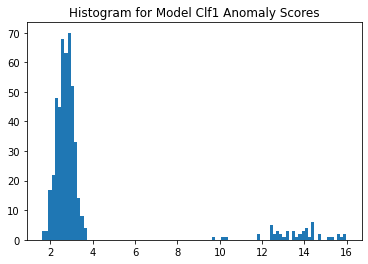

In [6]:
# Get the outlier scores for the train data
y_train_scores = clf1.decision_scores_  

# Predict the anomaly scores
y_test_scores = clf1.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

# Plot it!
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()